          

# Exploratory Data Analysis-IPL 

# Author -Stuti Singhal

# The Sparks Foundation  -Task 5 

### AIM -->

a.most successful teams 
b.most successful players 
c.factors contributing win or loss of a team.
d.Suggest teams or players a company should endorse for its products.


### importing necessary libararies 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

### importing data sets

In [10]:
df_deliv=pd.read_csv('deliveries.csv')
df_matches=pd.read_csv('matches.csv')

In [11]:
df_deliv.shape

(179078, 21)

In [12]:
df_matches.shape

(756, 18)

### data pre-processing 

In [13]:
df_deliv.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [14]:
df_deliv.drop(['player_dismissed','inning','bowling_team','bowler','batting_team','non_striker','dismissal_kind','fielder'],axis=1,inplace=True)

In [15]:
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [16]:
df_matches.drop(['umpire1','umpire2','umpire3'],axis=1,inplace=True)
#df_matches.drop(df_matches.index[2],axis=0,inplace=True)

In [17]:
df_matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [18]:
df_matches[df_matches.city.isnull()][['city','date']]

,city,date
461,NaN,2014-04-19
462,NaN,2014-04-19
466,NaN,2014-04-23
468,NaN,2014-04-25
469,NaN,2014-04-25
474,NaN,2014-04-28
476,NaN,2014-04-30


In [19]:
df_matches.city=df_matches.city.fillna('Dubai')
df_matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [20]:
df_matches[df_matches.winner.isnull()][['result','winner']]


,result,winner
300,no result,NaN
545,no result,NaN
570,no result,NaN
744,no result,NaN


In [21]:
df_deliv.shape

(179078, 13)

In [22]:
df_matches.shape

(756, 15)

# category wise analysis 

### 1. ANALYSIS OF PLAYERS

In [23]:
df_matches.player_of_match.value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
                  ..
SW Billings        1
CR Brathwaite      1
Ishan Kishan       1
RA Tripathi        1
P Shaw             1
Name: player_of_match, Length: 226, dtype: int64

Index(['CH Gayle', 'AB de Villiers', 'DA Warner', 'MS Dhoni', 'RG Sharma',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'MEK Hussey',
       ...
       'PP Ojha', 'EJG Morgan', 'SM Katich', 'LR Shukla', 'Shoaib Akhtar',
       'SW Billings', 'CR Brathwaite', 'Ishan Kishan', 'RA Tripathi',
       'P Shaw'],
      dtype='object', length=226)


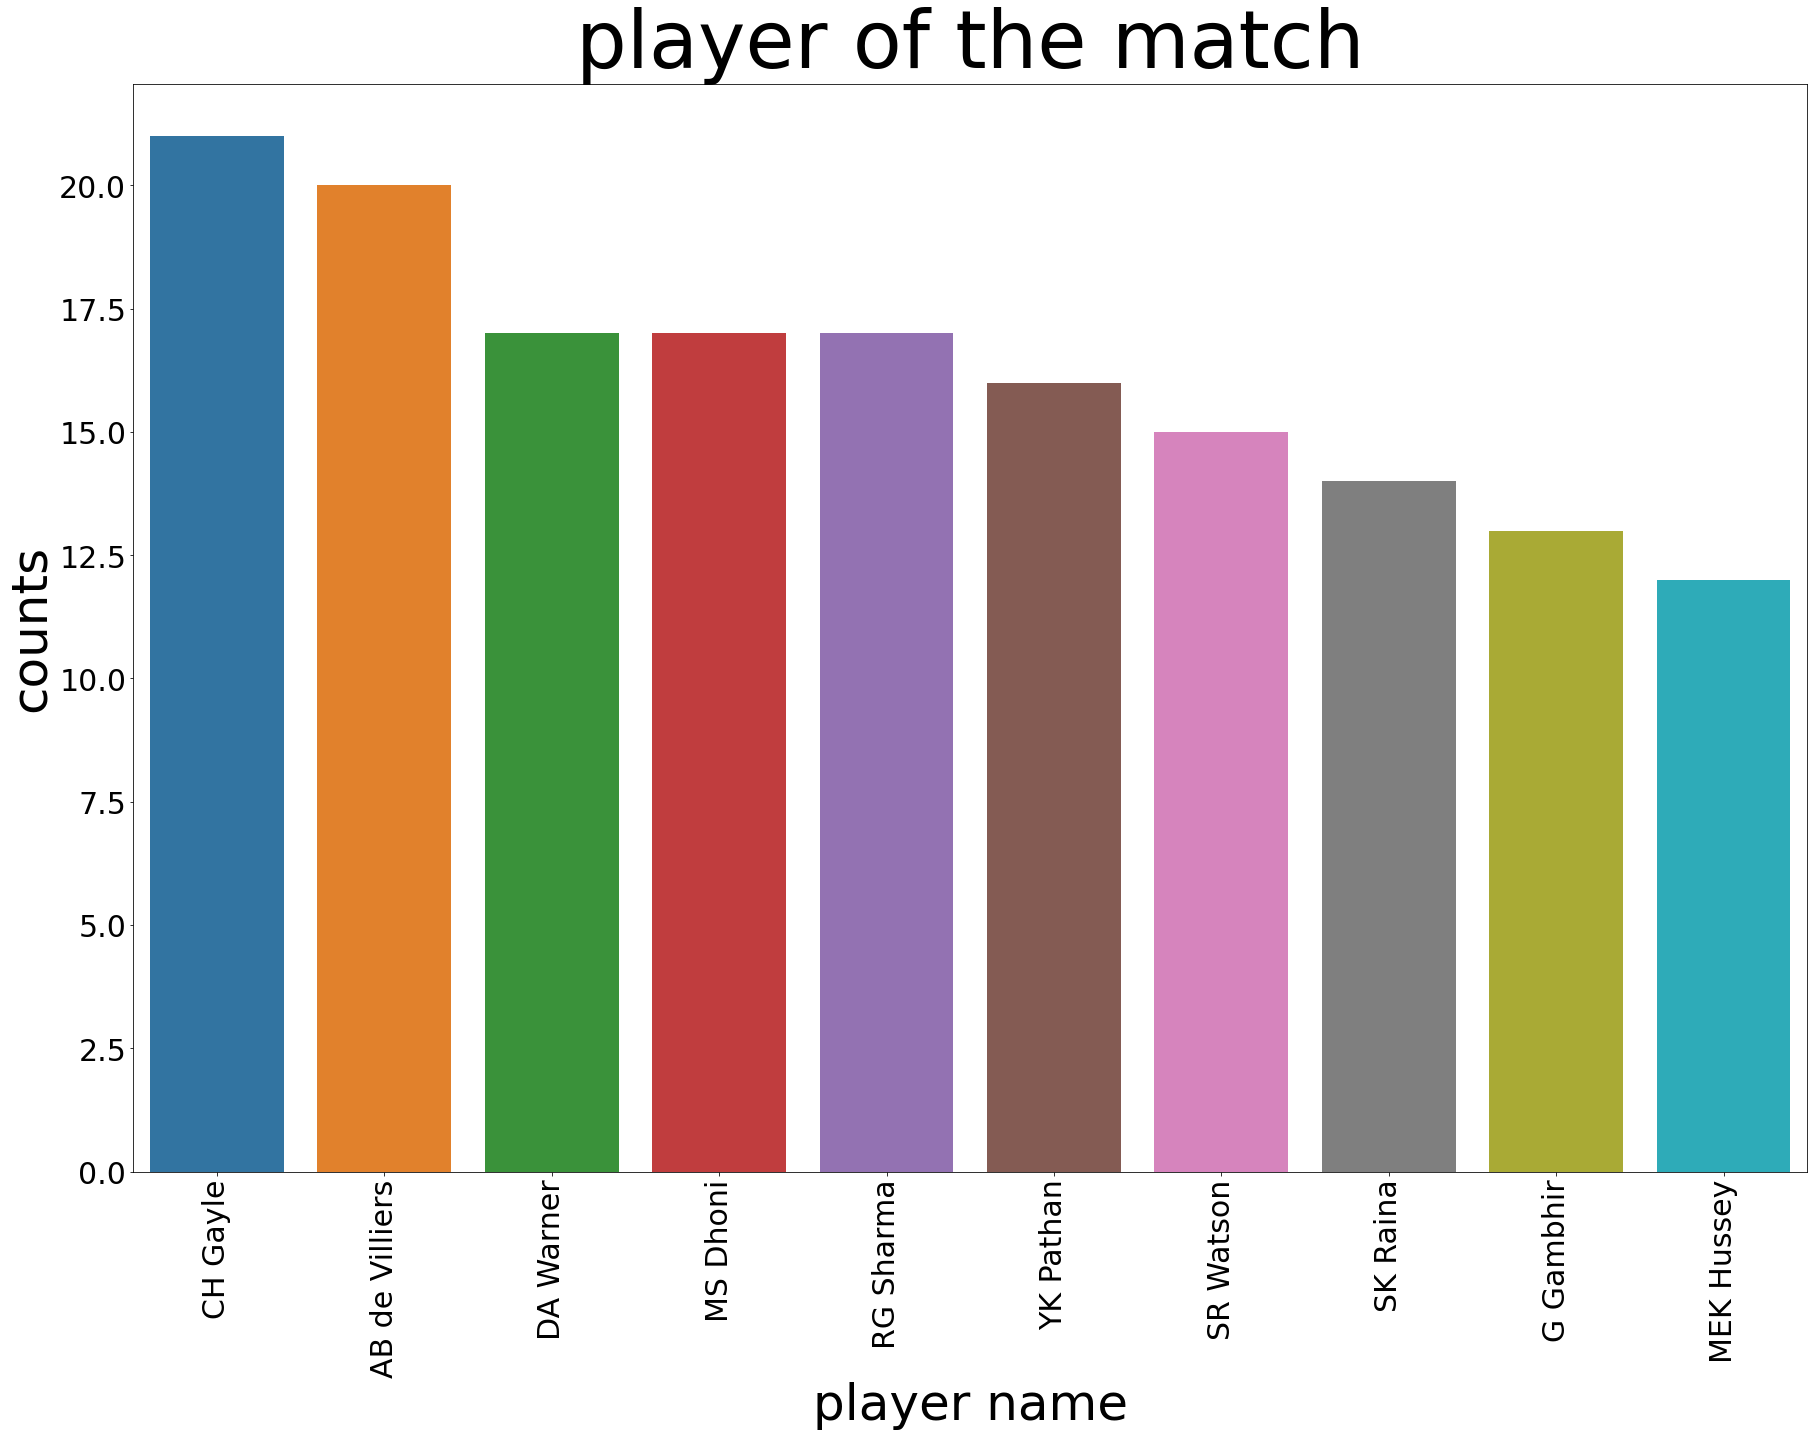

In [24]:
plt.figure(figsize=(30,20))
#sns.set(style="whitegrid")
player1=df_matches["player_of_match"].value_counts().index
print(player1)
sns.countplot(df_matches.player_of_match,order=player1[:10])
plt.title("player of the match",size=80)
plt.xlabel("player name",size=50)
plt.ylabel("counts",size=50)
plt.xticks(size=30,rotation=90)
plt.yticks(size=30)
plt.show()

### players with most runs in IPL history 

In [25]:
df_deliv2 =df_deliv.groupby("batsman").sum("batsman_runs")

In [26]:
df_deliv3=df_deliv2.sort_values("batsman_runs",ascending=False)
df_deliv4=df_deliv3.reset_index()

In [27]:
df_deliv4.head(5)

,batsman,match_id,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
0,V Kohli,8090018,39005,14728,2,118,5,45,14,0,5434,182,5616
1,SK Raina,7509946,38851,14677,3,149,4,64,19,0,5415,236,5651
2,RG Sharma,6448276,40942,13479,0,78,2,50,13,0,4914,143,5057
3,DA Warner,6673034,24904,11899,1,127,28,63,16,0,4741,234,4975
4,S Dhawan,8446314,26567,13428,0,141,12,79,12,0,4632,244,4876


In [28]:
df_deliv5=df_deliv4[['batsman','batsman_runs']]
df_deliv5.head(5)

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632


<AxesSubplot:xlabel='batsman'>

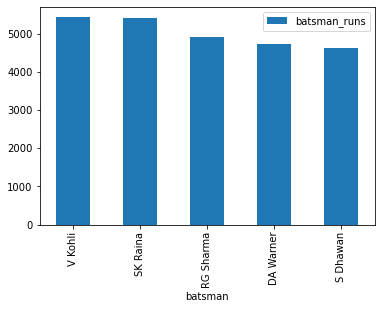

In [29]:
df_deliv5.head().plot.bar(x="batsman",y="batsman_runs")

## 2.analysis of teams 

In [30]:
teams=df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

In [31]:
df_matches['winner'].replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

In [32]:
teams=df_matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

In [33]:
len(teams)

14

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Rising Pune Supergiants', 'Gujarat Lions', 'Pune Warriors',
       'Delhi Capitals', 'Kochi Tuskers Kerala'],
      dtype='object')


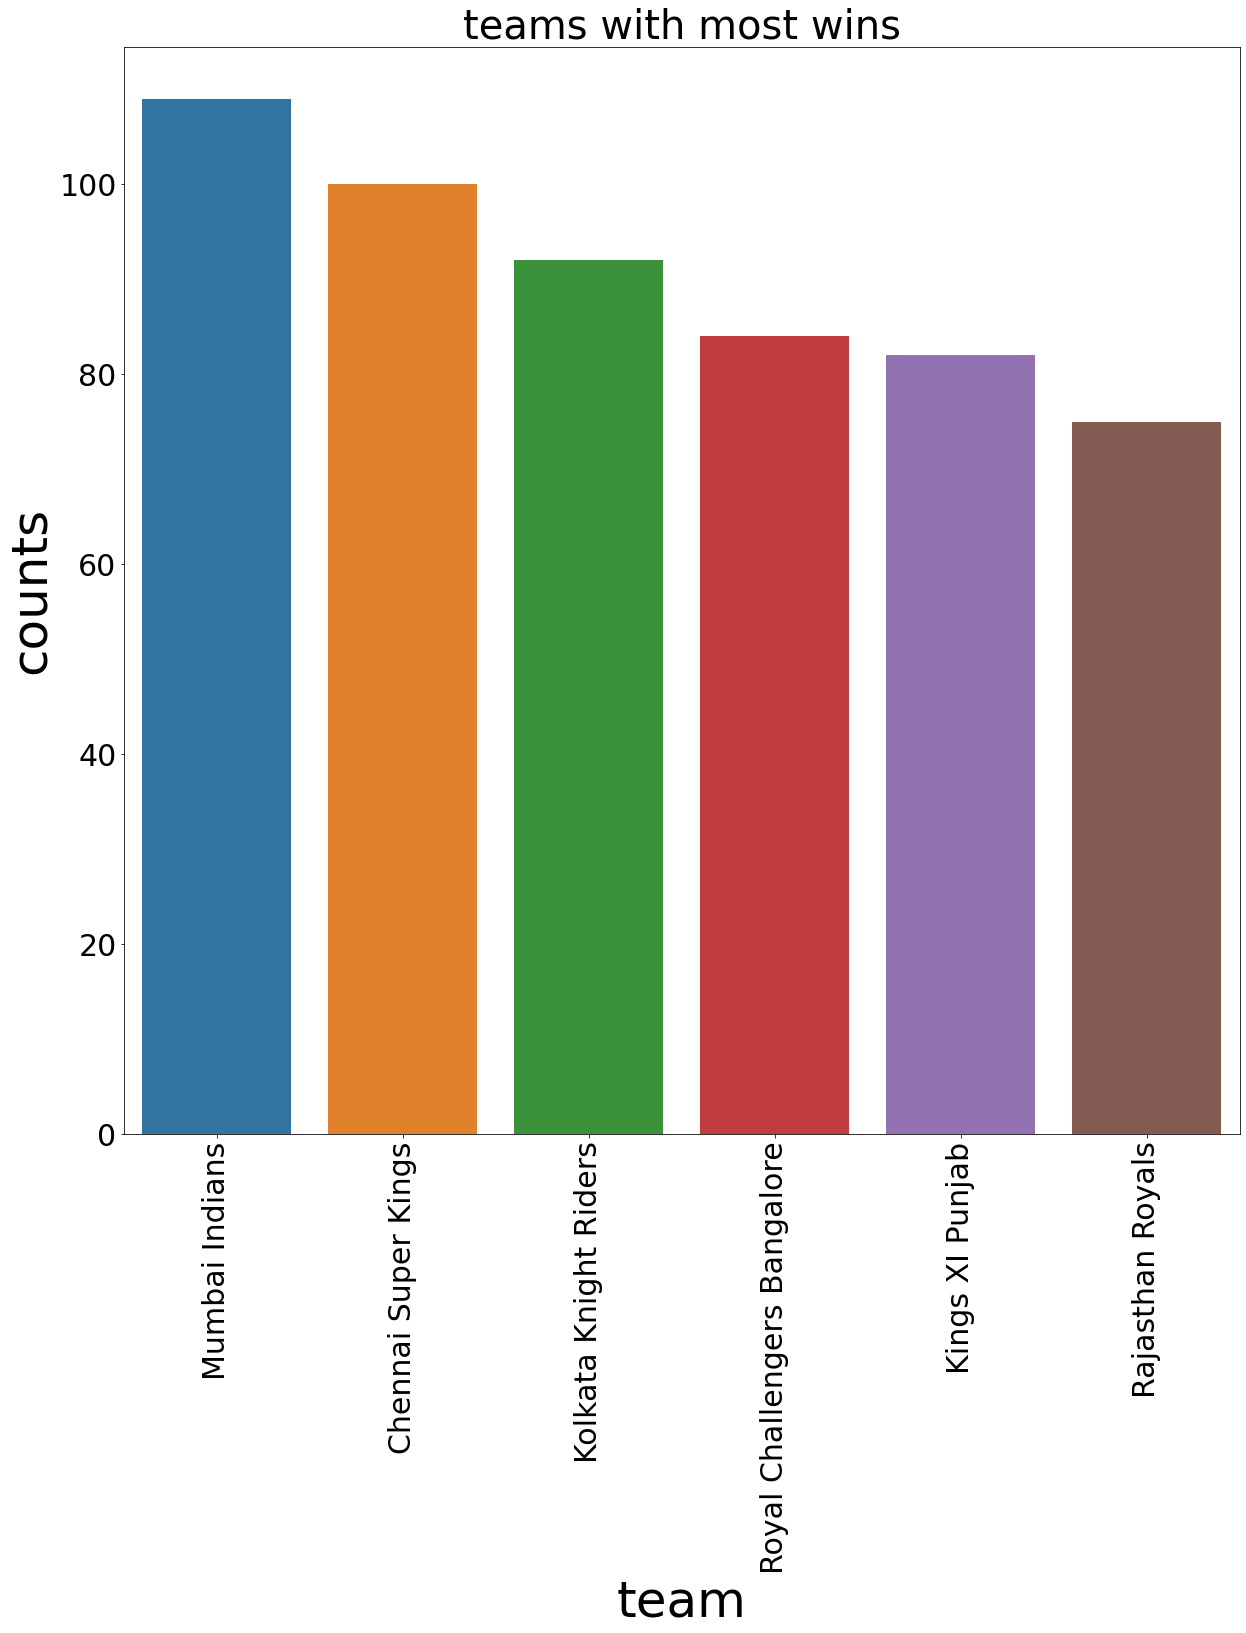

In [34]:
plt.figure(figsize=(20,20))
#sns.set(style="whitegrid")
team_wins=df_matches['winner'].value_counts().index
print(team_wins)
sns.countplot(df_matches.winner,order=team_wins[:6])
plt.title("teams with most wins",size=40)
plt.xlabel("team",size=50)
plt.ylabel("counts",size=50)
plt.xticks(size=30,rotation=90)
plt.yticks(size=30)
plt.show()

# Team with most IPL titles

In [35]:

final_matches=df_matches.drop_duplicates(subset=['season'],keep='last')
k=final_matches[['season','winner']].reset_index(drop=True).sort_values('season')
print(k)
k.winner.unique()

    season                 winner
1     2008       Rajasthan Royals
2     2009        Deccan Chargers
3     2010    Chennai Super Kings
4     2011    Chennai Super Kings
5     2012  Kolkata Knight Riders
6     2013         Mumbai Indians
7     2014  Kolkata Knight Riders
8     2015         Mumbai Indians
9     2016    Sunrisers Hyderabad
0     2017         Mumbai Indians
10    2018    Chennai Super Kings
11    2019         Mumbai Indians


array(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad'],
      dtype=object)

In [36]:
k['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Rajasthan Royals         1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

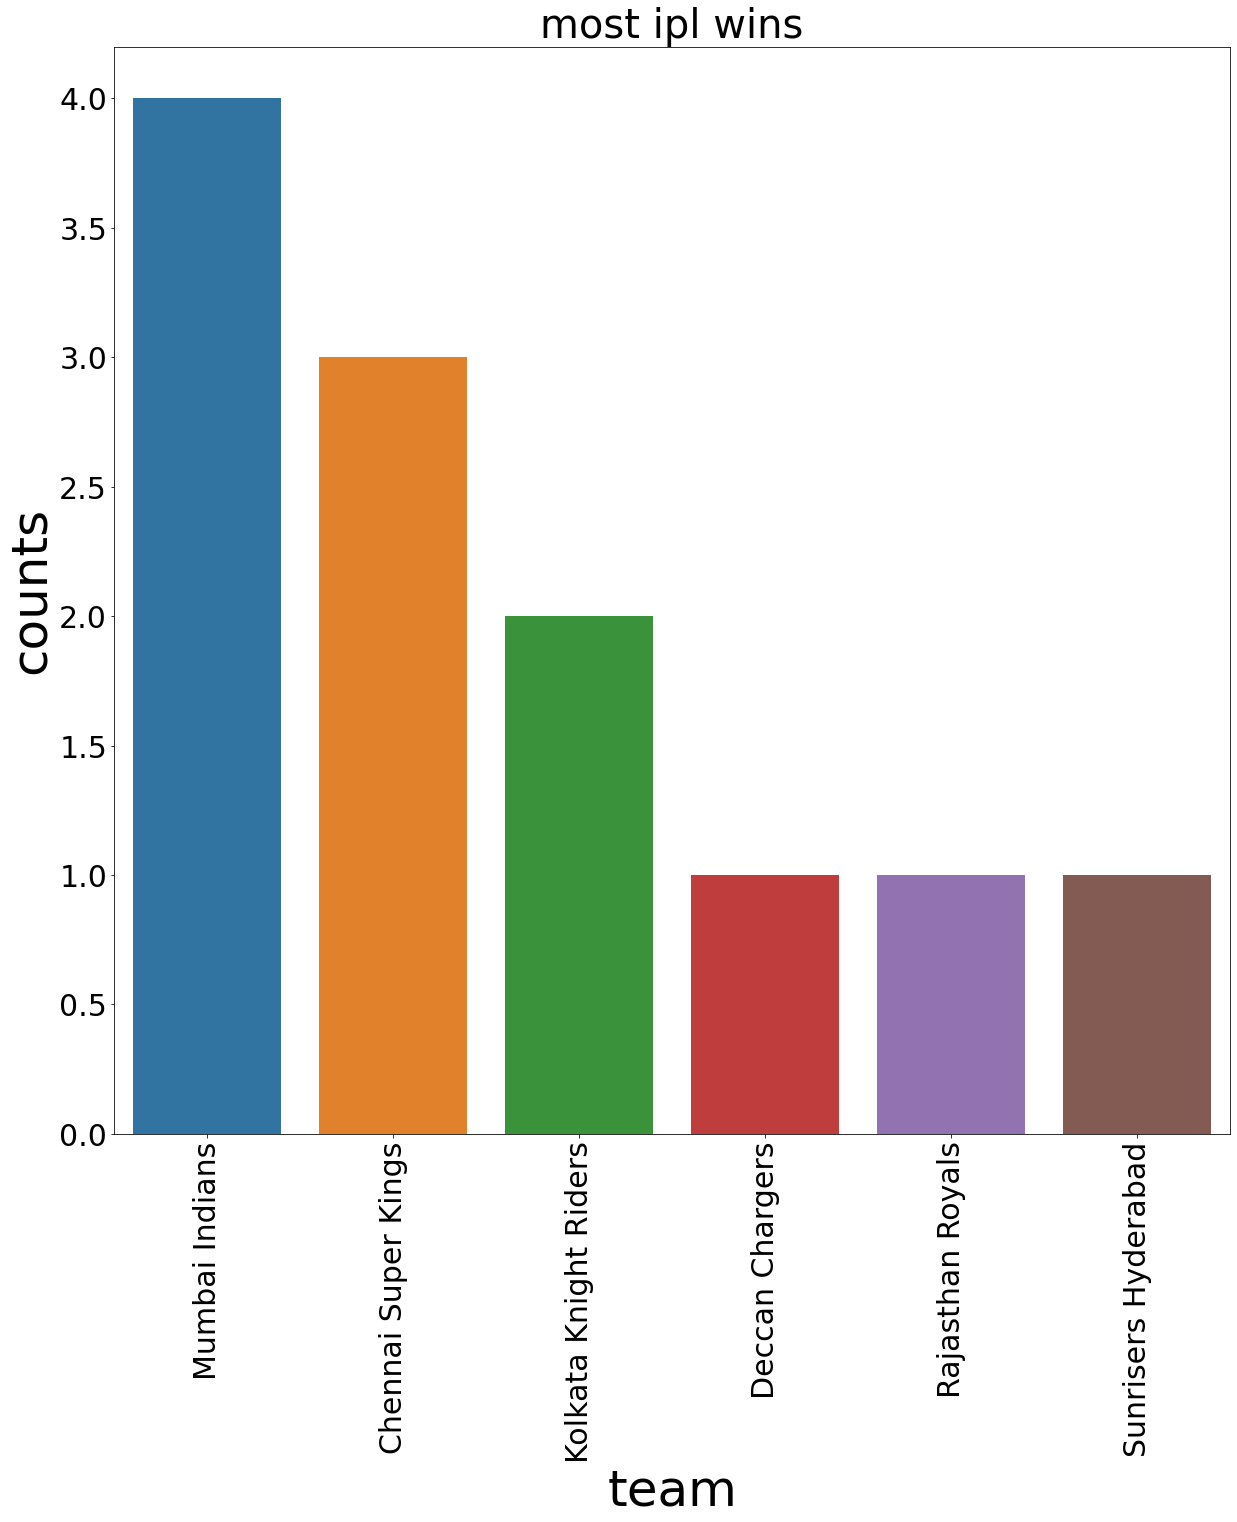

In [37]:
plt.figure(figsize=(20,20))
#sns.set(style="whitegrid")
k2=k['winner'].value_counts().index
sns.countplot(k.winner,order=k2[:6])
plt.title("most ipl wins",size=40)
plt.xlabel("team",size=50)
plt.ylabel("counts",size=50)
plt.xticks(size=30,rotation=90)
plt.yticks(size=30)
plt.show()

# 3.toss impact on team wins

In [38]:
most_toss_wins=df_matches['toss_winner'].value_counts()
most_toss_wins

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [39]:
df_matches['toss_winner'].replace(to_replace='Rising Pune Supergiant',value='Rising Pune Supergiants',inplace=True)

In [40]:
most_toss_wins=df_matches['toss_winner'].value_counts()
most_toss_wins

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

Index(['Mumbai Indians', 'Kolkata Knight Riders', 'Chennai Super Kings',
       'Kings XI Punjab', 'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Rajasthan Royals', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Pune Warriors', 'Gujarat Lions', 'Rising Pune Supergiants',
       'Delhi Capitals', 'Kochi Tuskers Kerala'],
      dtype='object')


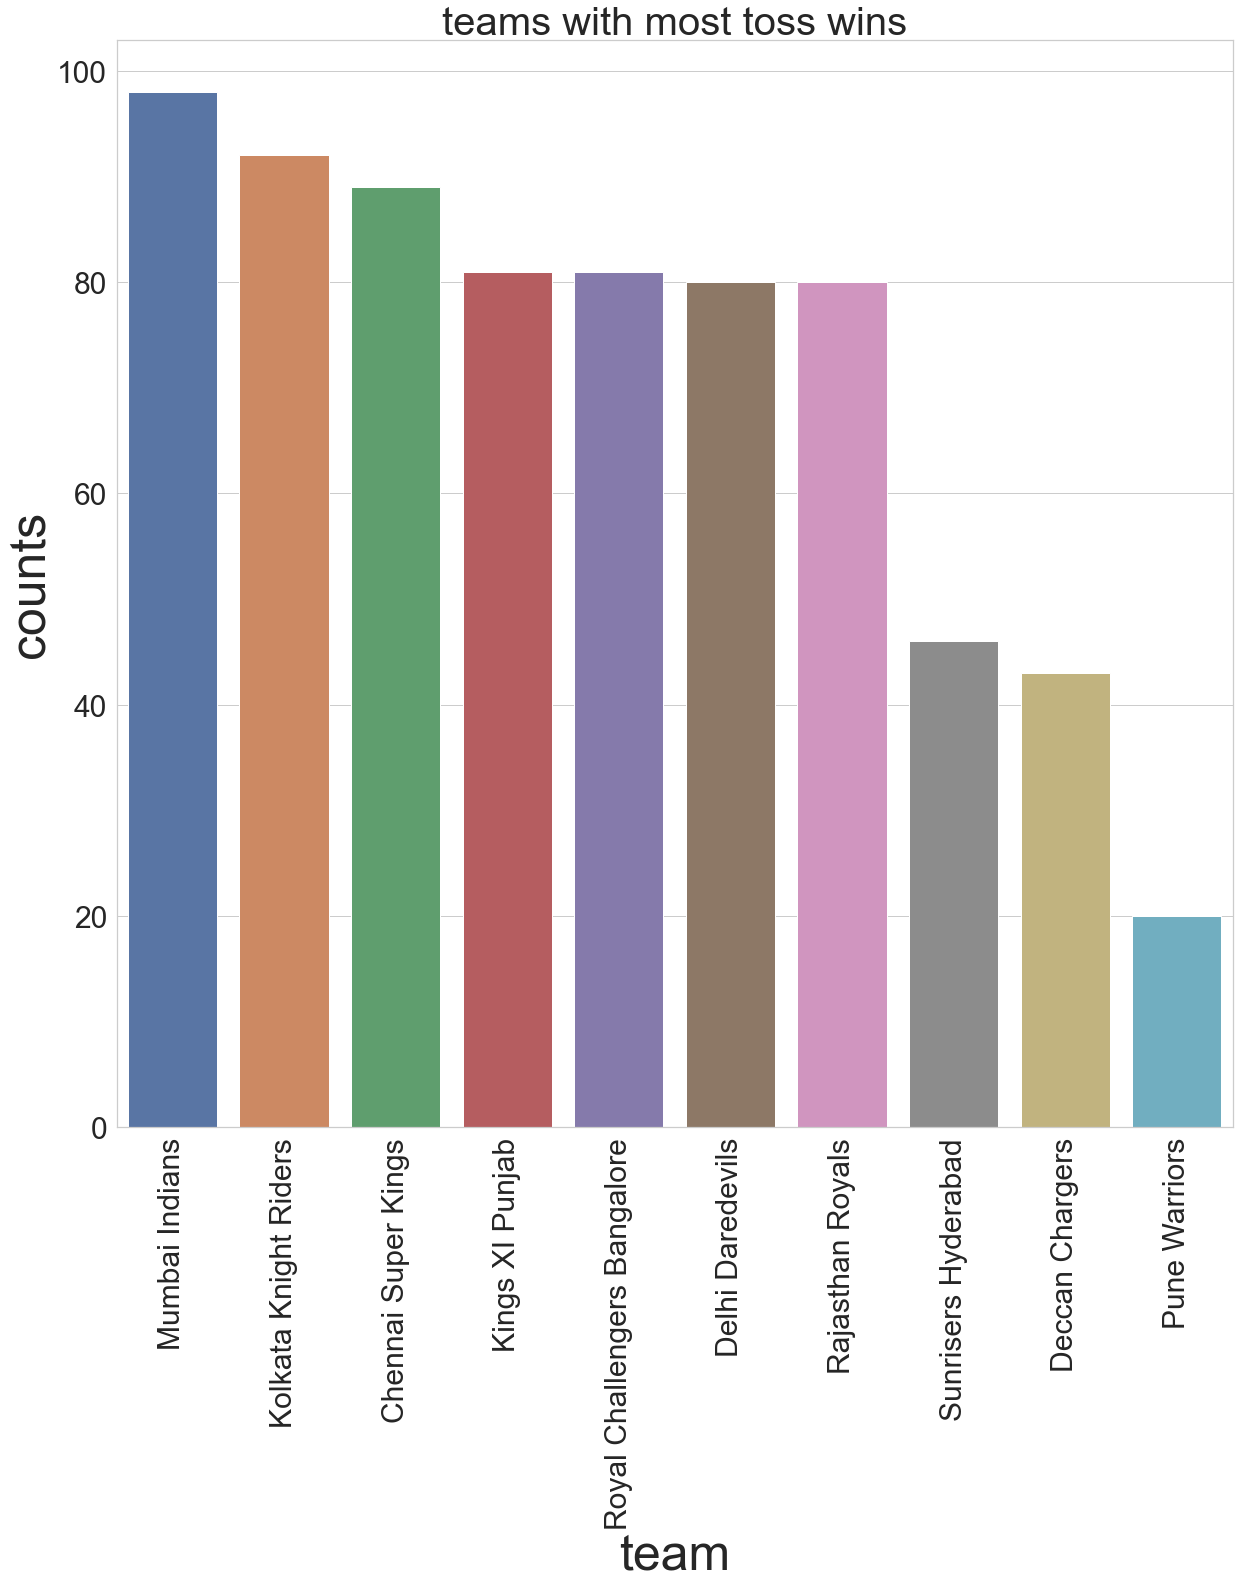

In [41]:
plt.figure(figsize=(20,20))
sns.set(style="whitegrid")
team_toss=df_matches['toss_winner'].value_counts().index
print(team_toss)
sns.countplot(df_matches.toss_winner,order=team_toss[:10])
plt.title("teams with most toss wins",size=40)
plt.xlabel("team",size=50)
plt.ylabel("counts",size=50)
plt.xticks(size=30,rotation=90)
plt.yticks(size=30)
plt.show()

### preffered desicion on toss wins 

In [42]:
toss_decision=df_matches['toss_decision'].value_counts()

In [43]:
toss_decision

field    463
bat      293
Name: toss_decision, dtype: int64

In [45]:
It means most number of teams preffered to field first when they won the toss

SyntaxError: invalid syntax (<ipython-input-45-52d8e08c2431>, line 1)

### a.batting first decision

In [46]:
most_wins_batting_first =df_matches.winner[df_matches.win_by_runs!=0].value_counts()
most_wins_batting_first

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Rajasthan Royals', 'Delhi Daredevils',
       'Deccan Chargers', 'Rising Pune Supergiants', 'Pune Warriors',
       'Delhi Capitals', 'Kochi Tuskers Kerala', 'Gujarat Lions'],
      dtype='object')


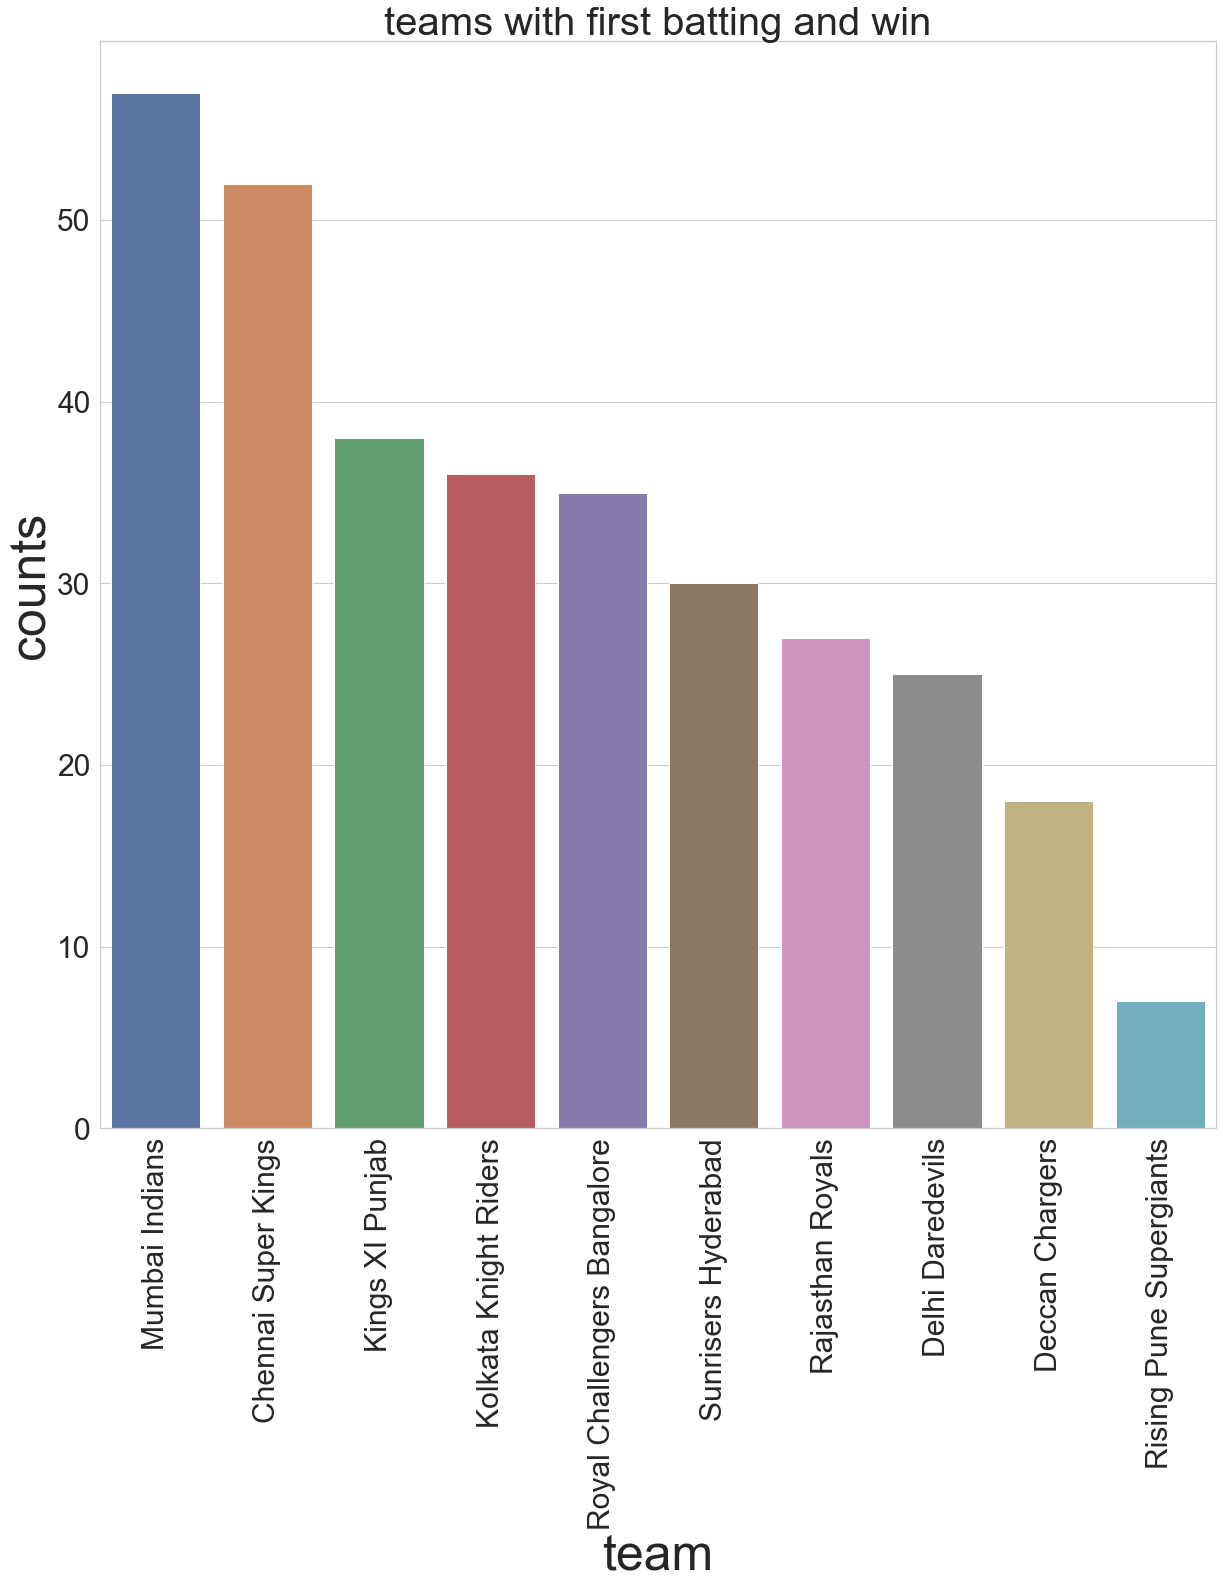

In [47]:
plt.figure(figsize=(20,20))
#sns.set(style="whitegrid")
most_wins_batting_first =df_matches.winner[df_matches.win_by_runs!=0].value_counts().index
print(most_wins_batting_first)
sns.countplot(df_matches.winner[df_matches.win_by_runs!=0],order=most_wins_batting_first[:10])
plt.title("teams with first batting and win",size=40)
plt.xlabel("team",size=50)
plt.ylabel("counts",size=50)
plt.xticks(size=30,rotation=90)
plt.yticks(size=30)
plt.show()

In [ ]:
Conclusion :-
    
    1.Total 14 teams participated in IPL from 2008-2019 of which 6 win titles most of the times
    2.Mumabi indians is the most successful team in IPL history (with most ipl titles i.e 4) and most number of match wins (109)
    3.Top 3 teams won the most number of tosses and teams who won toss first preffered to field first 61.2 % times 
    4.Mumabi indians was the most successful teams while defending the target.
    5.Amongst the players CH GYLE has been man of the match most of times ,v kholi has has had most number of runs in ipl history.